PART 1

In [78]:
# This Program is the solution for ex1 of Machine Learning
# Perform Linear Regression on one variable dataset using gradient descent
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

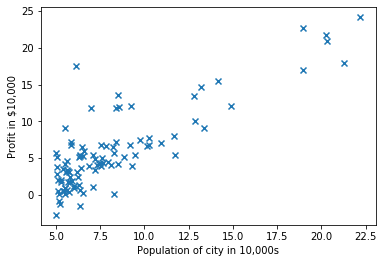

In [79]:
Data1 = pd.read_csv("data1ex1.txt", header=None,names=['X','Y'])
Data1.insert(0,'Ones',1.0)
# plt.scatter(Data1.iloc[:,0],Data1.iloc[:,1],marker="x")
plt.scatter(Data1['X'],Data1['Y'],marker="x")


plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000')
plt.show()

The cost Function for linear Regression is implemented below. It has the form of:
$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})^2 $$

with the hypothesis: $ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1x_1$

In [80]:
def LinRegrCostFunction(th,Y,X):
    # Cost Function for Linear Regression
    m = Y.size
    h = X @ th
    s = np.sum((h[:]-Y[:])**2)
    J = (1/(2*m))*s
    return J

The Gradient descent equation is shown below.

$$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}  $$

The gradient descent works by updating the $\theta_j$ simultaneously for all $j$. $\alpha$ is the learning parameter which can be tuned to achieve convergence. The implementation is shown in the equation below.


In [81]:
def GradientDescent(th,Y,X,iterations=1500,alpha=0.01):
    #Gradient Descent for 2 variables Linear Regression
    m = Y.size
    JHistory = np.zeros(iterations) 
    for i in range(iterations):
        h = X @ th
        th = th - (alpha/m)*X.T@(h-Y)
        JHistory[i] = LinRegrCostFunction(th,Y,X)
    return th,JHistory

Theta: [-3.63029144  1.16636235]


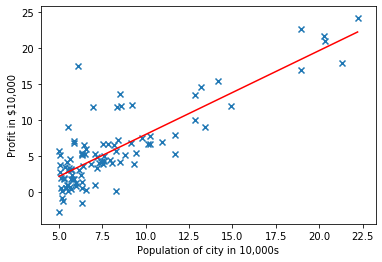

In [82]:
X = Data1[['Ones','X']].to_numpy()
Y = Data1['Y'].to_numpy()
m,n = X.shape

theta = np.zeros(n)
iterations = 1500
alpha = 0.01 # Learning Rate

TH,HIST = GradientDescent(theta,Y,X,iterations,alpha)
print('Theta:',TH)

Xnew = np.linspace(np.amin(X[:,1]),np.amax(X[:,1]))
n = Xnew.size
Xnew = np.append(np.ones(n),Xnew).reshape((n,2), order='F')
Ynew = np.dot(Xnew, TH)
plt.plot(Xnew[:,1],Ynew,'r-')
plt.scatter(X[:,1],Y,marker="x")
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000')
plt.show()


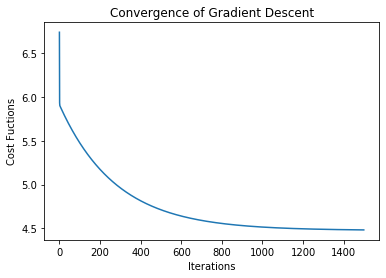

In [83]:
#Plotting the Convergence Data
plt.plot(HIST)
plt.xlabel('Iterations')
plt.ylabel('Cost Fuctions')
plt.title('Convergence of Gradient Descent')
plt.show()

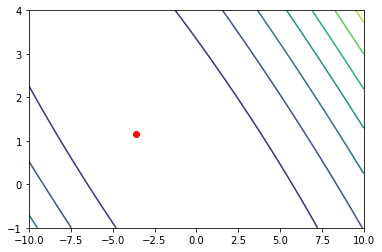

In [84]:
# Visualizing the Contour of the Cost Function
th0 = np.linspace(-10, 10, 200)
th1 = np.linspace(-1, 4, 200)
Jvals = np.zeros((th0.size,th1.size))

for i,ii in enumerate(th0):
    for j,jj in enumerate(th1):
        thetas = [th0[i],th1[j]]
        Jvals[i,j] = LinRegrCostFunction(thetas,Y,X)

plt.contour(th0,th1,Jvals)
plt.plot(TH[0],TH[1],"or")
plt.show()

The contour plot above shows the contour lines and the red dot shows the minimum point. This is where the function minima is located which corresponds to the $\theta$

PART 2
LET'S APPLY THE SAME IDEA TO MULTIPLE VARIABLES

In [85]:
# This Program is the solution for ex1 of Machine Learning (optional)
# Linear Regression for Multiple Variables using Gradient Descent
from mpl_toolkits.mplot3d import Axes3D

In [86]:
def LinRegrCostFunction(th,Y,X):
    # Cost Function for Linear Regression
    m = Y.size
    h = (X @ th) - Y[:]
    J = (1/(2*m))*np.dot(h.T,h)
    return J

In [87]:
def GradientDescent(th,Y,X,iterations=1500,alpha=0.01):
    #Gradient Descent for multiple variables Linear Regression
    m = Y.size
    JHistory = np.zeros(iterations) 
    for i in range(iterations):
        h = X @ th
        th = th - (alpha/m)*np.dot(X.T,(h[:]-Y[:]))
        JHistory[i] = LinRegrCostFunction(th,Y,X)
    return th,JHistory

Theta: [340412.56301439 110540.56654627  -6558.99054811]
(50, 3) (50,)


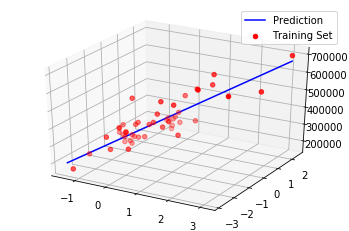

In [89]:
Data2 = pd.read_csv("data2ex1.txt", header=None,names=['size','bedrooms','price'])
Data2y = Data2['price']
Data2x = Data2[['size','bedrooms']]
Data2xNorm = (Data2x - Data2x.mean()) / Data2x.std()
Data2xNorm.insert(0, 'Ones', 1.0)
X, Y = Data2xNorm.to_numpy(),Data2y.to_numpy()
m,n = X.shape

theta = np.zeros(n)
iterations = 1500
alpha = 0.01 # Learning Rate

TH,HIST = GradientDescent(theta,Y,X,iterations,alpha)
print('Theta:',TH)

k = 50
Xnew = np.append(np.linspace(np.amin(X[:,1]),np.amax(X[:,1]),num=k),np.linspace(np.amin(X[:,2]),np.amax(X[:,2]),num=k))
Xnew = np.append(np.ones(k),Xnew).reshape((k,n), order='F')

Ynew = np.dot(Xnew, TH)

print(Xnew.shape,Ynew.shape)

# Plot the 3D line over the normalized training data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(Xnew[:,1], Xnew[:,2], Ynew, label='Prediction',c='b')
ax.scatter(X[:,1], X[:,2], Y, label='Training Set',c='r')
ax.legend()
plt.show()



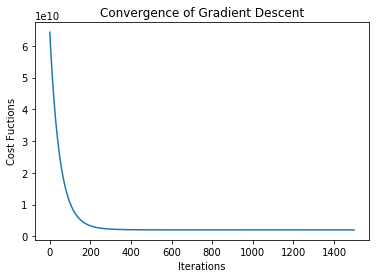

In [90]:
#Plotting the Convergence Data
plt.plot(HIST)
plt.xlabel('Iterations')
plt.ylabel('Cost Fuctions')
plt.title('Convergence of Gradient Descent')
plt.show()